In [17]:
from trackml.randomize import shuffle_hits
from trackml.score import score_event
from trackml.dataset import load_event

event_path = '../Data/train_100_events/event000001000'
hits, cells, particles, truth = load_event(event_path)

Generate solution by shuffling truth dataset with some probability to reassign a hit
---

In [18]:
shuffled = shuffle_hits(truth, 0.05) # 5% probability to reassign a hit
score = score_event(truth, shuffled)
print(score)

0.9508389278404866


Generate random solution with the given number of tracks
---

In [35]:
from trackml.randomize import random_solution

particles = truth.particle_id.unique()
particles_count = particles.shape[0]

random = random_solution(hits, particles_count) # 
score = score_event(truth, random)
print(score)

0.0


In [40]:
def score_random(trim_value):
    hits_trim, truth_trim = hits[1:trim_value], truth[1:trim_value]

    particles_trim = truth_trim.particle_id.unique()
    particles_count = particles_trim.shape[0]

    random_trim = random_solution(hits_trim, particles_count) # 
    score = score_event(truth_trim, random_trim)
    return score
    
print(score_random(10))

0.5924378227444085


In [64]:
x = range(5, 10000, 100)
y = [score_random(trim_value) for trim_value in x]

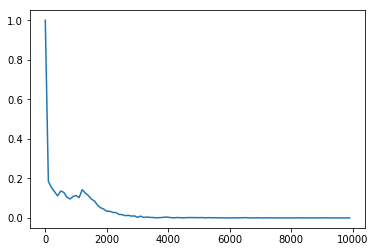

In [65]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [62]:
score_random(10000)

6.393067655746829e-05